In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)
piyg = cm.get_cmap('PiYG', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

import glob, root_pandas
import uproot3
from scipy.optimize import curve_fit

import misc_util

image_dir = "/home/sebouh/dihadron-analysis-note/images"

def read_n(pattern, n):
    print(n)
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        return b

Welcome to JupyROOT 6.22/06


/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [2]:
help(iter([1]))

Help on list_iterator object:

class list_iterator(object)
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __length_hint__(...)
 |      Private method returning an estimate of len(list(it)).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.



In [3]:
inb_dihadrons = pd.concat([root_pandas.read_root(f) for f in glob.glob('/home/sebouh/tuples_hadd/inbend_dihadrons.root')])

outb_dihadrons = pd.concat([root_pandas.read_root(f) for f in glob.glob('/home/sebouh/tuples_hadd/outbend_dihadrons.root')])

In [4]:
print(len(inb_dihadrons))

6828158


In [5]:
inb_mix=read_n('/home/sebouh/tuples_hadd/inbend_mixed_50xx.root',len(inb_dihadrons)*5)

outb_mix = read_n('/home/sebouh/tuples_hadd/outbend_mixed_56xx.root',len(outb_dihadrons)*5)

34140790
30534685


In [28]:
print(len(inb_mix))

21893607


In [1]:
inb_mix[len(inb_mix)//2].to_root('/home/sebouh/tuples_hadd/inbend_mixed_smaller.root')
outb_mix[len(outb_mix)//2].to_root('/home/sebouh/tuples_hadd/outbend_mixed_smaller.root')

NameError: name 'inb_mix' is not defined

In [29]:
#inb_dihadrons =  uproot3.open('../in/data_dihadrons_100pc.root')['dihadrons'].pandas.df()

In [30]:
#outb_dihadrons =  uproot3.open('../in/outbend_56xx_dihadrons.root')['dihadrons'].pandas.df()

In [31]:
#inb_mix =  pd.concat([pd.read_pickle("../in/data_dihadrons_mixed_part1_%i.pkl"%i) for i in (2,8,9)])
#outb_mix = pd.concat([pd.read_pickle("../in/outbend_5666_mix_%i.pkl"%i) for i in range(10)])


average relative discrepancy =  0.09576794381167635


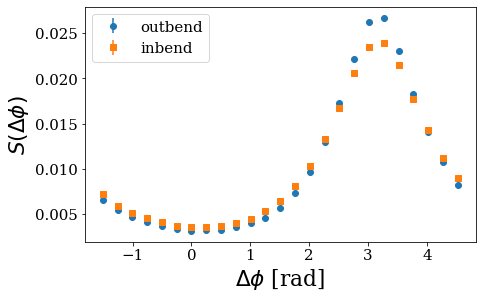

In [32]:
q = 'h2_pid==2212 and h1_cm_pt > 0.1 and h2_cm_pt > 0.1 and diff_rap_cm > 1.5 and diff_rap_cm < 2.5'
bins = 25
yo,x = np.histogram(outb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
yi,x = np.histogram(inb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

x = pd.Series([(x[i] + x[i+1])/2 for i in range(len(x)-1)])
yo = pd.Series(yo)
yi = pd.Series(yi)
x = x+2*np.pi*(x<-np.pi/2)
#x,yo,yi = shift(x,yo,yi)

dx = x[1]-x[0]
plt.errorbar(x,yo*dx/sum(yo),np.sqrt(yo)*dx/sum(yo),linestyle='',marker='o',label='outbend')
plt.errorbar(x,yi*dx/sum(yi),np.sqrt(yi)*dx/sum(yi),linestyle='',marker='s',label='inbend')
plt.gca().set_ylabel("$S(\Delta\phi)$")
plt.gca().set_xlabel("$\Delta\phi$ [rad]")
plt.legend(loc='upper left')

yo = yo*dx/sum(yo)
yi = yi*dx/sum(yi)
print("average relative discrepancy = ", np.sqrt(np.average((2*(yo-yi)/(yo+yi))**2)))

average relative discrepancy =  0.06682838294150534


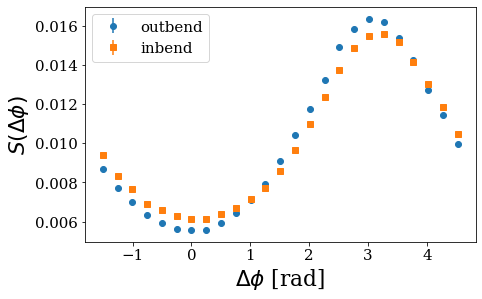

In [33]:
q = 'abs(h2_pid)==211 and h1_cm_pt > 0.1 and h2_cm_pt > 0.1 and diff_rap_cm > 1.5 and diff_rap_cm < 2.5'
bins = 25
yo,x = np.histogram(outb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
yi,x = np.histogram(inb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

x = pd.Series([(x[i] + x[i+1])/2 for i in range(len(x)-1)])

x = x+2*np.pi*(x<-np.pi/2)
#x,yo,yi = shift(x,yo,yi)

dx = x[1]-x[0]
plt.errorbar(x,yo*dx/sum(yo),np.sqrt(yo)*dx/sum(yo),linestyle='',marker='o',label='outbend')
plt.errorbar(x,yi*dx/sum(yi),np.sqrt(yi)*dx/sum(yi),linestyle='',marker='s',label='inbend')
plt.gca().set_ylabel("$S(\Delta\phi)$")
plt.gca().set_xlabel("$\Delta\phi$ [rad]")
plt.legend(loc='upper left')

yo = yo*dx/sum(yo)
yi = yi*dx/sum(yi)
print("average relative discrepancy = ", np.sqrt(np.average((2*(yo-yi)/(yo+yi))**2)))

In [34]:

def in_out_comparison(query="1==1"):
    fig, axss = plt.subplots(5,3, figsize=(16, 16))
    bins = 25
    queries = ['h2_pid==2212 and h1_pid == 211 and ' + query,
               'h2_pid==2212 and h1_pid == -211 and ' + query,
               'h2_pid==211 and h1_pid ==211 and ' + query,
              'h2_pid==-211 and h1_pid ==211 and ' + query,
              'h2_pid==211 and h1_pid ==-211 and ' + query]
    labels = '$\pi^+p$ $\pi^-p$ $\pi^+\pi^+$ $\pi^-\pi^+$ $\pi^+\pi^-$'.split()
    
    axss[0][0].set_title("$S(\Delta\phi)$")
    axss[0][1].set_title("$M(\Delta\phi)$")
    axss[0][2].set_title("$C(\Delta\phi)$")
    for ax in axss[-1]:
        ax.set_xlabel("$\Delta\phi$ [rad]")
    for i,(axs,q) in enumerate(zip(axss, queries)):

        yso,x = np.histogram(outb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
        ysi,x = np.histogram(inb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

        yso = pd.Series(yso)
        ysi = pd.Series(ysi)
        dyso = np.sqrt(yso)
        dysi = np.sqrt(ysi)

        ymo,x = np.histogram(outb_mix.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
        ymi,x = np.histogram(inb_mix.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

        ymo = pd.Series(ymo)
        ymi = pd.Series(ymi)
        dymo = np.sqrt(yso)
        dymi = np.sqrt(ysi)

        x = pd.Series([(x[i] + x[i+1])/2 for i in range(len(x)-1)])
        x = x+2*np.pi*(x<-np.pi/2)

        #x,yo,yi = shift(x,yo,yi)

        yco = yso/ymo
        yci = ysi/ymi

        dyco = yco*np.hypot(dyso/yso,dymo/ymo)
        dyci = yci*np.hypot(dysi/ysi,dymi/ymi)

        dx = x[1]-x[0]

        plt.sca(axs[0])
        plt.gca().text(0.15,0.8, labels[i],fontsize=18, transform=plt.gca().transAxes)
        plt.errorbar(x,ysi*dx/np.sum(ysi),dysi*dx/np.sum(ysi),linestyle='',marker='o',label='inbend')
        plt.errorbar(x,yso*dx/np.sum(yso),dyso*dx/np.sum(yso),linestyle='',marker='s',label='outbend')
        #plt.gca().set_ylabel("$S(\Delta\phi)$")
        
        plt.ylim(0)

        plt.sca(axs[1])
        plt.errorbar(x,ymi*dx/np.sum(ymi),dymi*dx/np.sum(ymi),linestyle='',marker='o',label='inbend')
        plt.errorbar(x,ymo*dx/np.sum(ymo),dymo*dx/np.sum(ymo),linestyle='',marker='s',label='outbend')
        #plt.gca().set_ylabel("$M(\Delta\phi)$")
        #plt.legend(loc='upper left')
        plt.ylim(0)

        plt.sca(axs[2])
        plt.errorbar(x,yci*dx/np.sum(yci),dyci*dx/np.sum(yci),linestyle='',marker='o',label='inbend')
        plt.errorbar(x,yco*dx/np.sum(yco),dyco*dx/np.sum(yco),linestyle='',marker='s',label='outbend')
        #plt.gca().set_ylabel("$C(\Delta\phi)$")
        
        #plt.legend(loc='upper left')
        plt.ylim(0)

        yso = yso*dx/sum(yso)
        ysi = ysi*dx/sum(ysi)
        print("average relative discrepancy (S) = ", np.sqrt(np.average((2*(yso-ysi)/(yso+ysi))**2)))

        yco = yco*dx/sum(yco)
        yci = yci*dx/sum(yci)
        print("average relative discrepancy (C) = ", np.sqrt(np.average((2*(yco-yci)/(yco+yci))**2)))
    axss[0][2].legend(loc='upper left')

average relative discrepancy (S) =  0.15720479320569786
average relative discrepancy (C) =  0.047084073985818306
average relative discrepancy (S) =  0.1687013302534653
average relative discrepancy (C) =  0.120238271830344
average relative discrepancy (S) =  0.2453803005162541
average relative discrepancy (C) =  0.224466664945841
average relative discrepancy (S) =  0.0849378603525126
average relative discrepancy (C) =  0.2805824375527817
average relative discrepancy (S) =  0.0498096701269667
average relative discrepancy (C) =  0.1657787234768889


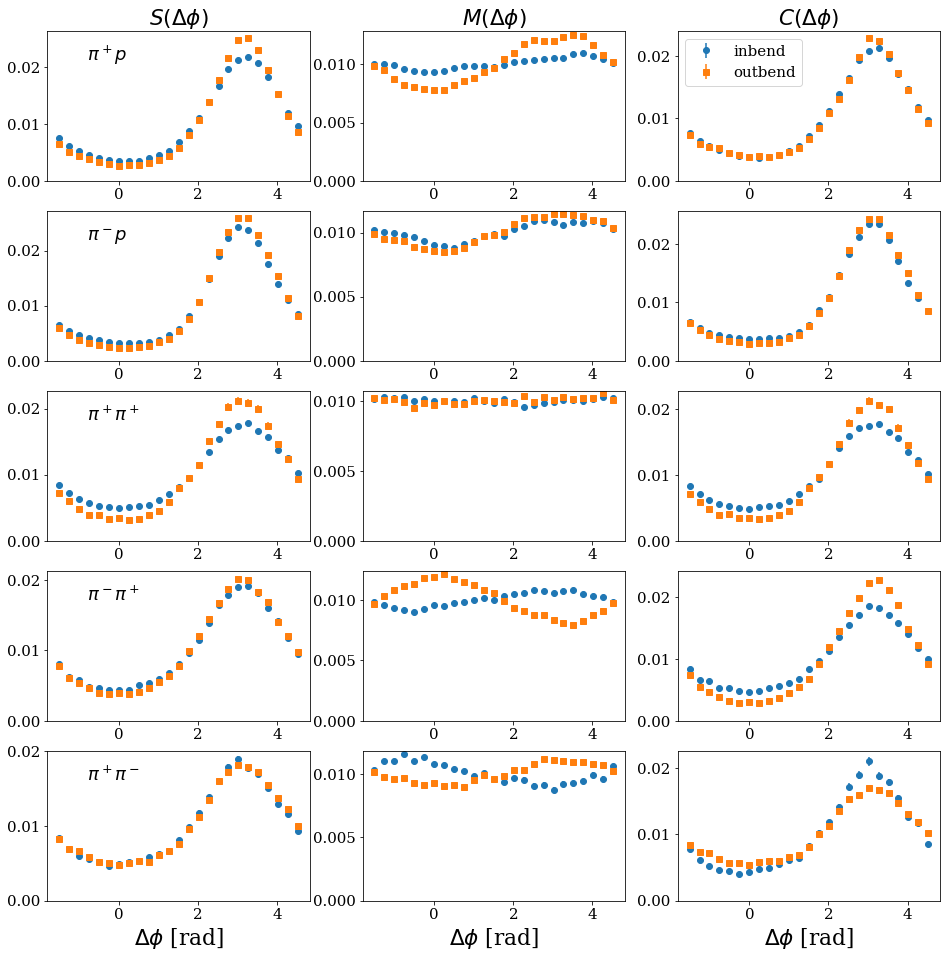

In [35]:

in_out_comparison(query=' diff_rap_cm > 1.5 and diff_rap_cm < 2.5 and h1_cm_pt>.3 and h1_cm_pt>.3 and h1_z>h2_z and mx_eh1x > 1.665')
plt.savefig("../images/smc_inoutbend.pdf",bbox_inches='tight')

<ipython-input-36-e0b53f6ca047>:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(df.eval("h2_cm_pt"),histtype='step',normed=True,bins=100, range=(0,10))


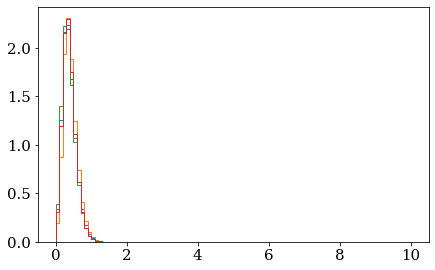

In [36]:
for df in inb_dihadrons, outb_dihadrons,inb_mix,outb_mix:
    plt.hist(df.eval("h2_cm_pt"),histtype='step',normed=True,bins=100, range=(0,10))

In [37]:

def hists(q):
    yso,x = np.histogram(outb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
    ysi,x = np.histogram(inb_dihadrons.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

    yso = pd.Series(yso)
    ysi = pd.Series(ysi)
    dyso = np.sqrt(yso)
    dysi = np.sqrt(ysi)

    ymo,x = np.histogram(outb_mix.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))
    ymi,x = np.histogram(inb_mix.query(q).diff_phi_cm,bins=bins,range=(-np.pi,np.pi))

    ymo = pd.Series(ymo)
    ymi = pd.Series(ymi)
    dymo = np.sqrt(yso)
    dymi = np.sqrt(ysi)

    x = pd.Series([(x[i] + x[i+1])/2 for i in range(len(x)-1)])
    x = x+2*np.pi*(x<-np.pi/2)

    #x,yo,yi = shift(x,yo,yi)

    yco = yso/ymo
    yci = ysi/ymi

    dyco = yco*np.hypot(dyso/yso,dymo/ymo)
    dyci = yci*np.hypot(dysi/ysi,dymi/ymi)

    dx = x[1]-x[0]
    return x,yso,dyso,ymo,dymo,yco,dyco,ysi,dysi,ymi,dymi,yci,dyci

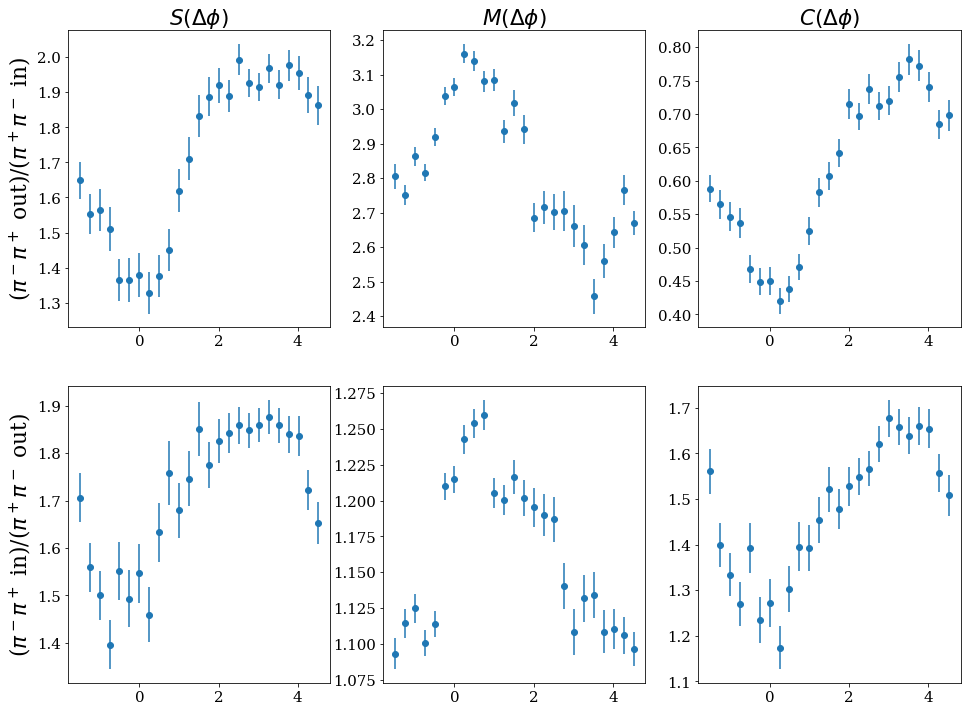

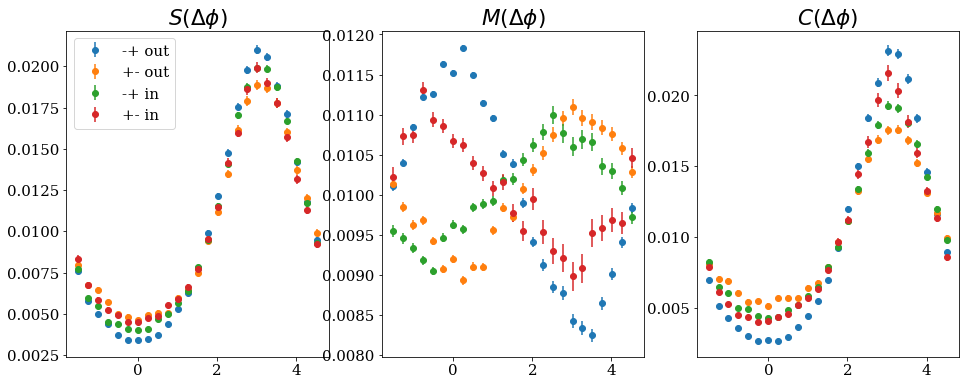

In [38]:
query = ' diff_rap_cm > 1.5 and diff_rap_cm < 2.5 and h1_cm_pt>.3 and h1_cm_pt>.3'
queries = ['h2_pid==-211 and h1_pid ==211 and ' + query, 'h2_pid==211 and h1_pid ==-211 and ' + query]

x,yso1,dyso1,ymo1,dymo1,yco1,dyco1,ysi1,dysi1,ymi1,dymi1,yci1,dyci1 = hists(queries[0])
x,yso2,dyso2,ymo2,dymo2,yco2,dyco2,ysi2,dysi2,ymi2,dymi2,yci2,dyci2 = hists(queries[1])

fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0][0].errorbar(x,yso1/ysi2,yso1/ysi2*np.hypot(dyso1/yso1,dysi2/ysi2),linestyle='',marker='o')
axs[0][1].errorbar(x,ymo1/ymi2,ymo1/ymi2*np.hypot(dymo1/ymo1,dymi2/ymi2),linestyle='',marker='o')
axs[0][2].errorbar(x,yco1/yci2,yco1/yci2*np.hypot(dyco1/yco1,dyci2/yci2),linestyle='',marker='o')
axs[1][0].errorbar(x,ysi1/yso2,ysi1/yso2*np.hypot(dysi1/ysi1,dyso2/yso2),linestyle='',marker='o')
axs[1][1].errorbar(x,ymi1/ymo2,ymi1/ymo2*np.hypot(dymi1/ymi1,dymo2/ymo2),linestyle='',marker='o')
axs[1][2].errorbar(x,yci1/yco2,yci1/yco2*np.hypot(dyci1/yci1,dyco2/yco2),linestyle='',marker='o')

axs[0][0].set_title("$S(\Delta\phi)$")
axs[0][1].set_title("$M(\Delta\phi)$")
axs[0][2].set_title("$C(\Delta\phi)$")

axs[0][0].set_ylabel("($\pi^-\pi^+$ out)/($\pi^+\pi^-$ in)")
axs[1][0].set_ylabel("($\pi^-\pi^+$ in)/($\pi^+\pi^-$ out)")
plt.savefig("../images/smc_ratios_inout.pdf",bbox_inches='tight')

fig, axs = plt.subplots(1,3, figsize=(16,6))

axs[0].errorbar(x,yso1*dx/np.sum(yso1),dyso1*dx/np.sum(yso1),linestyle='',marker='o', label="-+ out")
axs[1].errorbar(x,ymo1*dx/np.sum(ymo1),dymo1*dx/np.sum(ymo1),linestyle='',marker='o')
axs[2].errorbar(x,yco1*dx/np.sum(yco1),dyco1*dx/np.sum(yco1),linestyle='',marker='o')

axs[0].errorbar(x,yso2*dx/np.sum(yso2),dyso2*dx/np.sum(yso2),linestyle='',marker='o', label="+- out")
axs[1].errorbar(x,ymo2*dx/np.sum(ymo2),dymo2*dx/np.sum(ymo2),linestyle='',marker='o')
axs[2].errorbar(x,yco2*dx/np.sum(yco2),dyco2*dx/np.sum(yco2),linestyle='',marker='o')

axs[0].errorbar(x,ysi1*dx/np.sum(ysi1),dysi1*dx/np.sum(ysi1),linestyle='',marker='o', label="-+ in")
axs[1].errorbar(x,ymi1*dx/np.sum(ymi1),dymi1*dx/np.sum(ymi1),linestyle='',marker='o')
axs[2].errorbar(x,yci1*dx/np.sum(yci1),dyci1*dx/np.sum(yci1),linestyle='',marker='o')

axs[0].errorbar(x,ysi2*dx/np.sum(ysi2),dysi2*dx/np.sum(ysi2),linestyle='',marker='o', label="+- in")
axs[1].errorbar(x,ymi2*dx/np.sum(ymi2),dymi2*dx/np.sum(ymi2),linestyle='',marker='o')
axs[2].errorbar(x,yci2*dx/np.sum(yci2),dyci2*dx/np.sum(yci2),linestyle='',marker='o')


axs[0].set_title("$S(\Delta\phi)$")
axs[1].set_title("$M(\Delta\phi)$")
axs[2].set_title("$C(\Delta\phi)$")

axs[0].legend()

plt.savefig("../images/smc_dipions_inout.pdf",bbox_inches='tight')

In [64]:
def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)

def threebythree(query,deta_range=(-0.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=25,minbincontentindenom=0.003,text=""):
    
    elev = 70
    azim = -112.5#-135
    
    dphi_range = (-np.pi/2,3*np.pi/2)
    if fig == None:
        fig = plt.figure(figsize=(18,12))
        
    
    ax4 = fig.add_subplot(337)
    ax5 = fig.add_subplot(338)
    ax6 = fig.add_subplot(339)
    ycs, dycs = [],[]
    for jj, df, df_mixed in (0, inb_dihadrons.query(query),inb_mix.query(query)), (1, outb_dihadrons.query(query),outb_mix.query(query)):
        ax1 = fig.add_subplot(331+3*jj, projection='3d')
        ax1.view_init(azim=azim,elev = elev)


        denom = len(df)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins

        #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
        hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, offset(df.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
        hist1 = np.divide(hist1, denom)



        #print(xedges)
        hist2, xedges, yedges = np.histogram2d(df_mixed.diff_rap_cm, offset(df_mixed.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
        for i in range(bins):
            if xedges[i+1]>0:
                break
        for j in range(bins):
            if yedges[j+1]>0:
                break;

        radius = .3
        hist2 = np.divide(hist2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
        #radius = .1
        #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
        #print("M(0,0) = ", M00)
        #radius = .5
        #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
        #print("M(0,0) = ", M00)



        hist3 = np.divide(hist1,np.add(hist2,0.001))
        #hist3 *= np.greater(hist2*M00*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]),minbincontentindenom)



        xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
        zpos = 0
        #help(hist1.transpose)

        for i in range(len(xedges)-1):
            if(xedges[i]>projyrange[0]):
                break
        #print("i=",i)
        def plot2d(ax, hist):
            ax.plot_surface(xpos.transpose()[:i+1].transpose(), ypos.transpose()[:i+1].transpose(), hist[:i+1].transpose(), cmap=viridis,edgecolor='k')
            ax.plot_surface(xpos.transpose()[i:].transpose(), ypos.transpose()[i:].transpose(), hist[i:].transpose(), cmap=autumn,edgecolor='k')
        
        
        plt.gca().text(0.0,0.9,0.0, 'in-bend out-bend'.split()[jj],fontsize=18, transform=plt.gca().transAxes)
        
        plot2d(ax1,hist1)
        ax1.set_xlabel("$\\Delta y$")
        ax1.set_ylabel("$\\Delta\\phi$ [rad]")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_title("$S(\\Delta\\phi,\\Delta y)$",rotation=0)
        ax1.set_xlim(*deta_range)
        ax1.set_ylim(*dphi_range)


        ax2 = fig.add_subplot(332+3*jj, projection='3d')
        ax2.view_init(azim=azim,elev = elev)
        #surf = ax2.plot_surface(xpos, ypos, hist2.transpose(), cmap=viridis,edgecolor='k')
        plot2d(ax2,hist2)
        ax2.set_xlabel("$\\Delta y$")
        ax2.set_ylabel("$\\Delta\\phi$ [rad]")
        ax2.zaxis.set_rotate_label(False)
        ax2.set_title("$M(\\Delta\\phi,\\Delta y)$",rotation=0)
        ax2.set_xlim(*deta_range)
        ax2.set_ylim(*dphi_range)



        ax3 = fig.add_subplot(333+3*jj, projection='3d')
        ax3.view_init(azim=azim,elev = elev)
        #surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=viridis,edgecolor='k')
        plot2d(ax3,hist3)
        ax3.set_xlabel("$\\Delta y$")
        ax3.set_ylabel("$\\Delta\\phi$ [rad]")
        ax3.zaxis.set_rotate_label(False)
        ax3.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
        ax3.set_xlim(*deta_range)
        ax3.set_ylim(*dphi_range)
    
        #now for 1d plots
        df_highdy = df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
        denom = len(df_highdy)*2*np.pi/bins
        y, x = np.histogram(offset(df_highdy.diff_phi_cm), bins=bins1d, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        dy = np.sqrt(y)
        y=np.divide(y,denom)
        dy=np.divide(dy,denom)

        def plot1d(x,y,dy,ax,n=5):
            ax.errorbar(x,y,dy,marker='os'[jj],linestyle='', label='in-bend outbend'.split()[jj])
            ax.axhline(0,color='0.7',linestyle=':')
            
            ax.set_xlim(-np.pi/2,np.pi*3/2)
        plot1d(x,y,dy,ax4)
        ax4.add_artist(AnchoredText("$%s<\Delta y<%s$" % projyrange,loc='upper left'))
        ax4.set_xlabel("$\\Delta\\phi$ [rad]")
        ax4.set_title("$S(\\Delta\\phi)$",rotation=0)


        mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
        
        denom = len(mixed_highy)*2*np.pi/bins1d
        ym, _ = np.histogram(offset(mixed_highy.diff_phi_cm), bins=bins1d, range=(-np.pi/2,3*np.pi/2))
        dym = np.sqrt(ym)
        ym=np.divide(ym,denom)
        dym=np.divide(dym,denom)


        ax5.set_title("$M(\\Delta\\phi)$",rotation=0)
        plot1d(x,ym,dym,ax5)
        ax5.set_xlabel("$\\Delta\\phi$ [rad]")


        ax6.set_title("$C(\\Delta\\phi)$",rotation=0)
        dyc = y/ym*np.hypot(dy/y, dym/ym)
        yc= y/ym
        plot1d(x,yc,dyc,ax6)
        ax6.set_xlabel("$\\Delta\\phi$ [rad]")
        ycs.append(yc)
        dycs.append(dyc)
        
    ax6.legend()
    fig.text(0.1,0.78,text,bbox=dict(facecolor='white', alpha=0.5))
    print(ycs,dycs)
    chi2 = np.sum(((ycs[0]-ycs[1])**2/(dycs[0]**2+dycs[1]**2))[(ycs[0] +ycs[1] !=0)])
    ndof = sum((ycs[0] +ycs[1] !=0))-1
    from scipy.stats import chi2 as chi2lib
    print("chi2 is ", chi2, "; ndof is ", ndof, chi2lib.sf(chi2, ndof))
    return fig

<ipython-input-65-241d448299e9>:25: RuntimeWarning: divide by zero encountered in true_divide
  y = 7+15/x


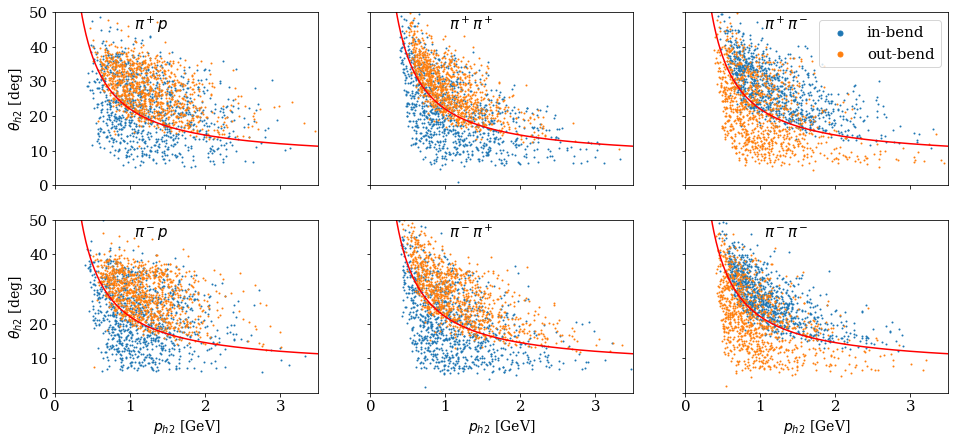

<ipython-input-65-241d448299e9>:25: RuntimeWarning: divide by zero encountered in true_divide
  y = 7+15/x


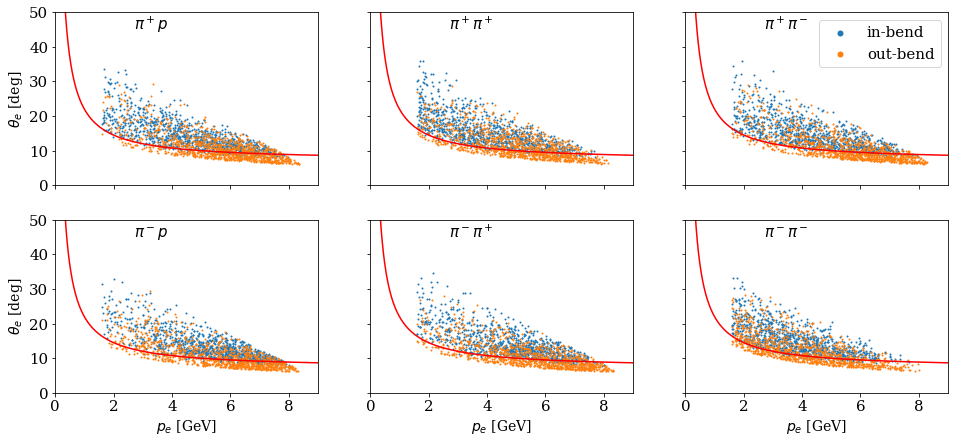

<ipython-input-65-241d448299e9>:25: RuntimeWarning: divide by zero encountered in true_divide
  y = 7+15/x


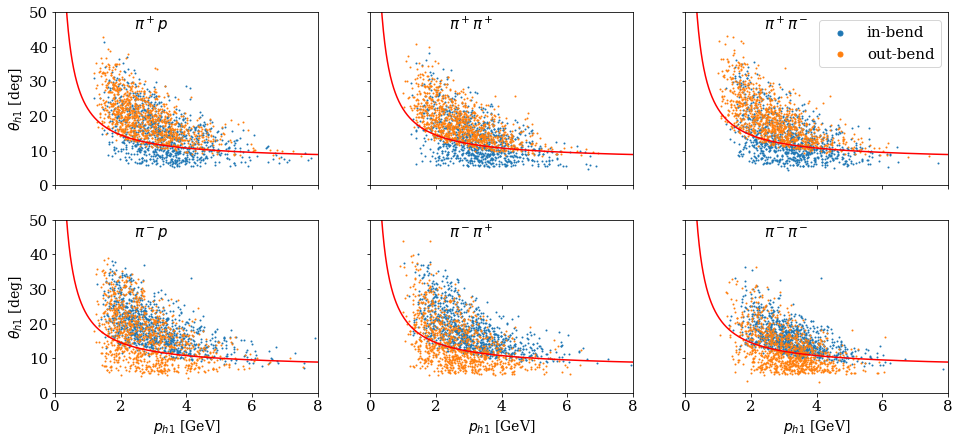

In [65]:
queries = ['h2_pid==2212 and h1_pid == 211',
               'h2_pid==2212 and h1_pid == -211',
               'h2_pid==211 and h1_pid ==211',
              'h2_pid==211 and h1_pid ==-211',
              'h2_pid==-211 and h1_pid ==211',
              'h2_pid==-211 and h1_pid ==-211']
texts = '$\pi^+ p$;$\pi^- p$;$\pi^+\pi^+$;$\pi^-\pi^+$;$\pi^+\pi^-$;$\pi^-\pi^-$'.split(';')
labels = 'pi+p pi-p pi+pi+ pi-pi+ pi+pi- pi-pi-'.split()

figsize=(16,7)
for name,xmax in zip(['h2','e','h1'],[3.5, 9,8]):
    fig,axs = plt.subplots(2,3, figsize=figsize,sharex='all',sharey='all')
    for jj in range(6):
        plt.sca(axs[jj%2][jj//2])
        plt.text(0.3,0.9,texts[jj], transform=plt.gca().transAxes)
        df = inb_dihadrons.query(queries[jj])[:1000]
        plt.scatter(df[name+'_p'], df[name+'_th']*180/np.pi,1,marker='o', label='in-bend')
        df = outb_dihadrons.query(queries[jj])[:1000]
        plt.scatter(df[name+'_p'], df[name+'_th']*180/np.pi,1,marker='o',label='out-bend')
        plt.xlim(0,xmax)
        plt.ylim(0,50)
        
        #fiducial cut
        x = np.arange(0, 10, .01)
        y = 7+15/x
        plt.plot(x,y,linestyle='-',color='r')
        
    for i in range(3):
        axs[-1][i].set_xlabel('$p_{%s}$ [GeV]'%name,fontsize=14)
    for i in range(2):
        axs[i][0].set_ylabel('$\\theta_{%s}$ [deg]'%name,fontsize=14)
    axs[0][2].legend(loc='upper right', markerscale=5.)
    plt.savefig(image_dir + "/p_vs_th_inout_%s.pdf" % name,bbox_inches='tight')
    plt.show()



[array([0.53633166, 0.54032744, 0.507181  , 0.42215857, 0.3765488 ,
       0.388619  , 0.32888008, 0.38040874, 0.37692015, 0.44606477,
       0.39927677, 0.43158036, 0.43557271, 0.68887649, 0.77630527,
       1.00306913, 1.09174557, 1.46931715, 1.64823286, 1.66770682,
       1.34489116, 1.1437508 , 0.89215737, 0.81196886, 0.69823347]), array([0.52095961, 0.44673575, 0.45744202, 0.43764841, 0.38771672,
       0.38506353, 0.41326417, 0.38176587, 0.34327369, 0.36077116,
       0.39816687, 0.4527322 , 0.52806955, 0.64578088, 0.85555813,
       1.06233878, 1.26023415, 1.57175881, 1.52043298, 1.46451397,
       1.28629829, 1.12678497, 0.89901338, 0.81532118, 0.65768357])] [array([0.03705597, 0.03781662, 0.03949796, 0.03598055, 0.0331107 ,
       0.03361134, 0.02918535, 0.03281757, 0.032574  , 0.03495613,
       0.03142045, 0.03166937, 0.03219372, 0.04409577, 0.04503666,
       0.05295288, 0.05404327, 0.06960198, 0.07902718, 0.07847934,
       0.06507534, 0.05606164, 0.04880474, 0.04885038, 0

<ipython-input-64-4b8cea64de72>:140: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/ym*np.hypot(dy/y, dym/ym)


[array([0.3949007 , 0.22803288, 0.18583562, 0.1253653 , 0.0745291 ,
       0.0525804 , 0.10619178, 0.07003165, 0.1033546 , 0.20603515,
       0.32376952, 0.30087672, 0.60529317, 0.88006441, 1.18231839,
       2.38107613, 2.7078905 , 3.45256039, 3.85874396, 4.00976093,
       2.12465255, 2.15846344, 1.18702049, 0.83576867, 0.53593666]), array([0.28042522, 0.09150718, 0.17171717, 0.09031877, 0.17386364,
       0.08481153, 0.        , 0.        , 0.        , 0.04575359,
       0.10079051, 0.44868035, 0.5625    , 1.13543599, 1.69820296,
       1.57461407, 2.66344294, 3.38811189, 5.61713287, 2.28767943,
       3.2027512 , 2.41477273, 1.23636364, 1.20123967, 0.7265943 ])] [array([0.11297559, 0.0839478 , 0.07260944, 0.05734819, 0.04361752,
       0.03753919, 0.05412698, 0.04095229, 0.04709541, 0.08078226,
       0.10329144, 0.0956249 , 0.15360176, 0.19867157, 0.25452152,
       0.45707498, 0.55859516, 0.7292004 , 0.79591082, 0.71972452,
       0.39744327, 0.39016621, 0.25166131, 0.191217  , 0

<ipython-input-64-4b8cea64de72>:140: RuntimeWarning: invalid value encountered in true_divide
  dyc = y/ym*np.hypot(dy/y, dym/ym)


[array([0.69843478, 0.41189744, 0.        , 0.        , 0.        ,
       0.        , 0.25909677, 0.1746087 , 0.        , 0.1746087 ,
       0.1867907 , 0.22948571, 0.86832432, 1.04765217, 0.89244444,
       1.69094737, 2.24896   , 3.012     , 1.72114286, 2.14186667,
       5.16342857, 2.67733333, 1.55458065, 1.6617931 , 0.41189744]), array([ 0.        ,  0.42037351,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.39489633,  0.28959064,
        0.40723684,  0.40723684,  0.        ,  1.13318078,  2.60631579,
        2.60631579,  1.86165414,  2.60631579, 13.03157895,  2.17192982,
        4.73875598,  2.60631579,  0.68587258,  1.62894737,  0.        ])] [array([0.51489295, 0.29863019,        nan,        nan,        nan,
              nan, 0.26324259, 0.17649641,        nan, 0.17649641,
       0.1889502 , 0.23274099, 0.45702824, 0.64310109, 0.54312439,
       0.9302233 , 0.96169575, 1.17729436, 1.09500659, 1.2052957 ,
       2.20605745, 1.26210704, 

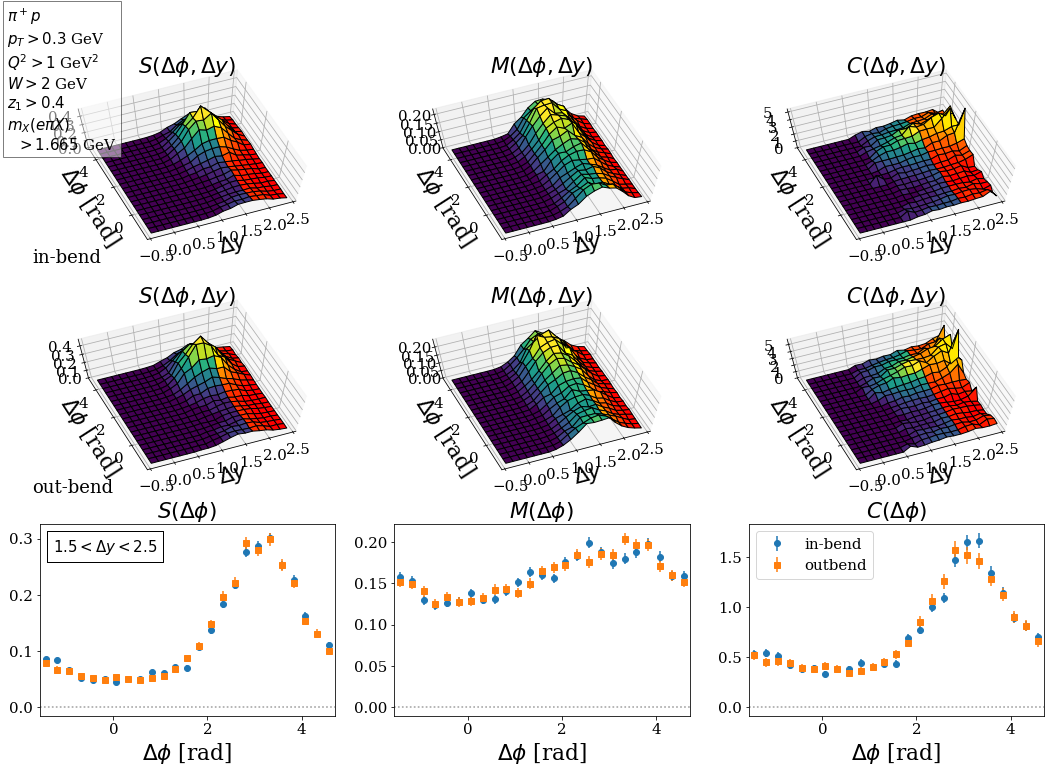

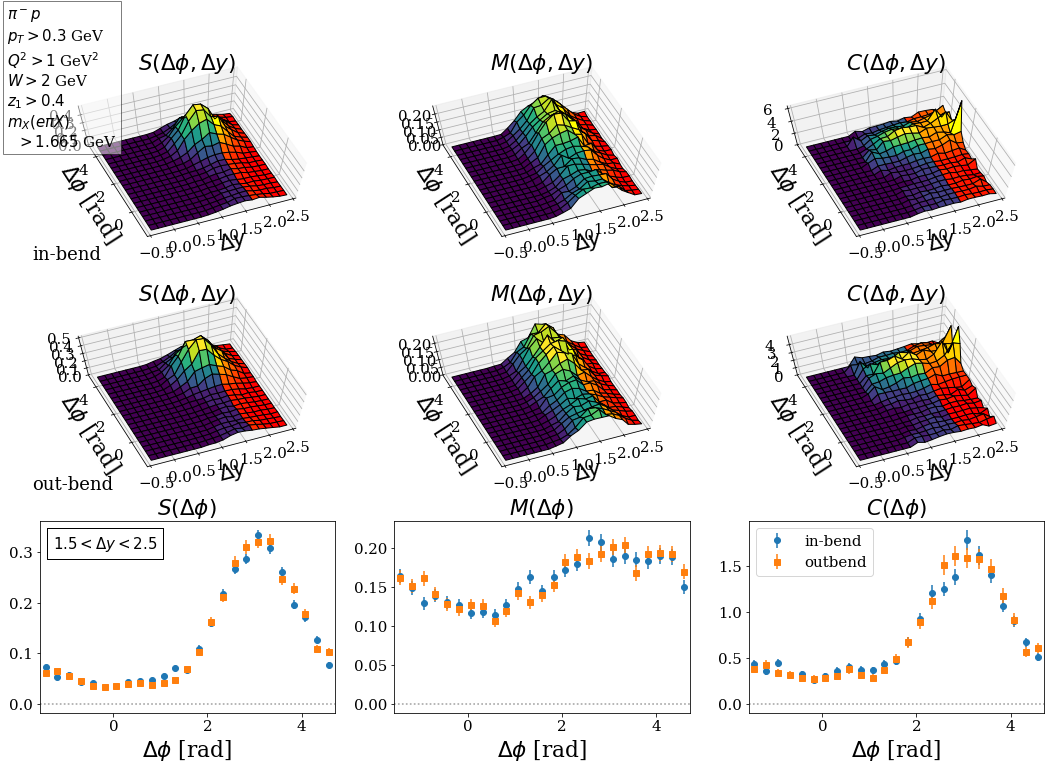

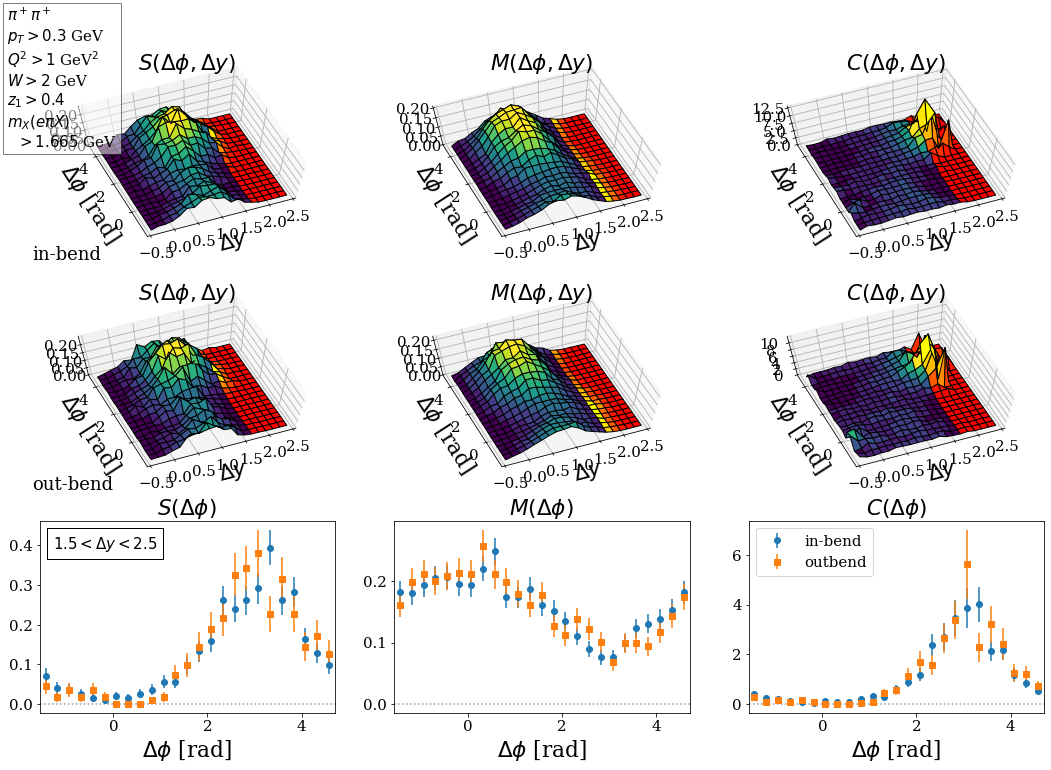

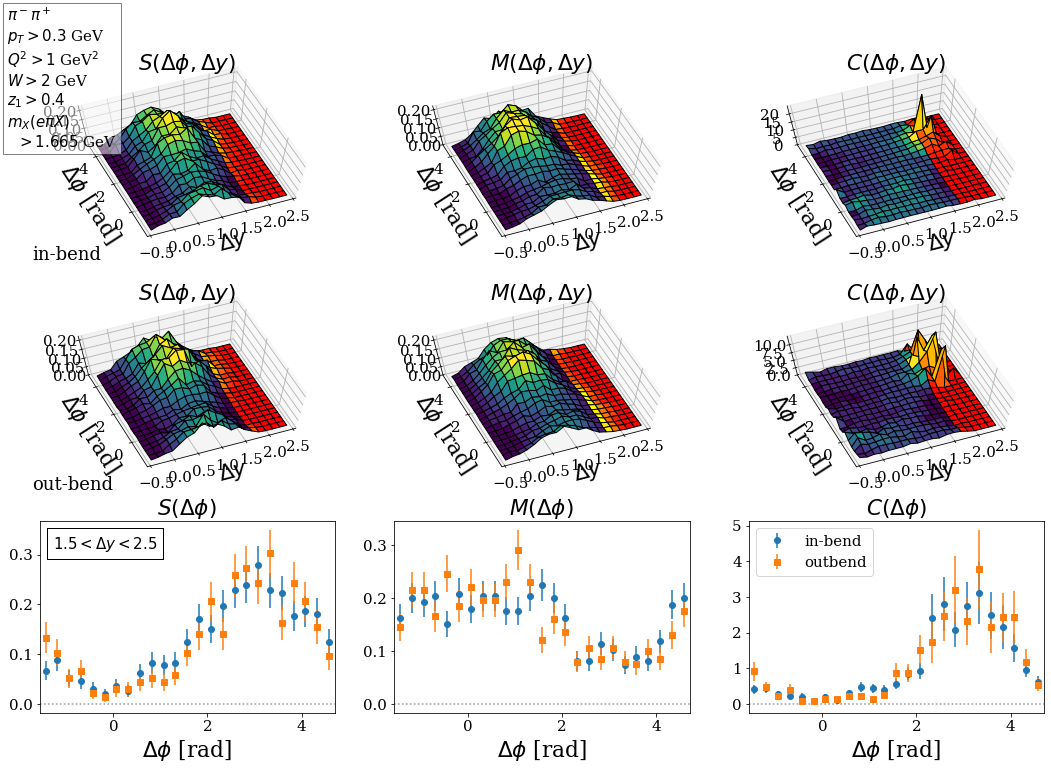

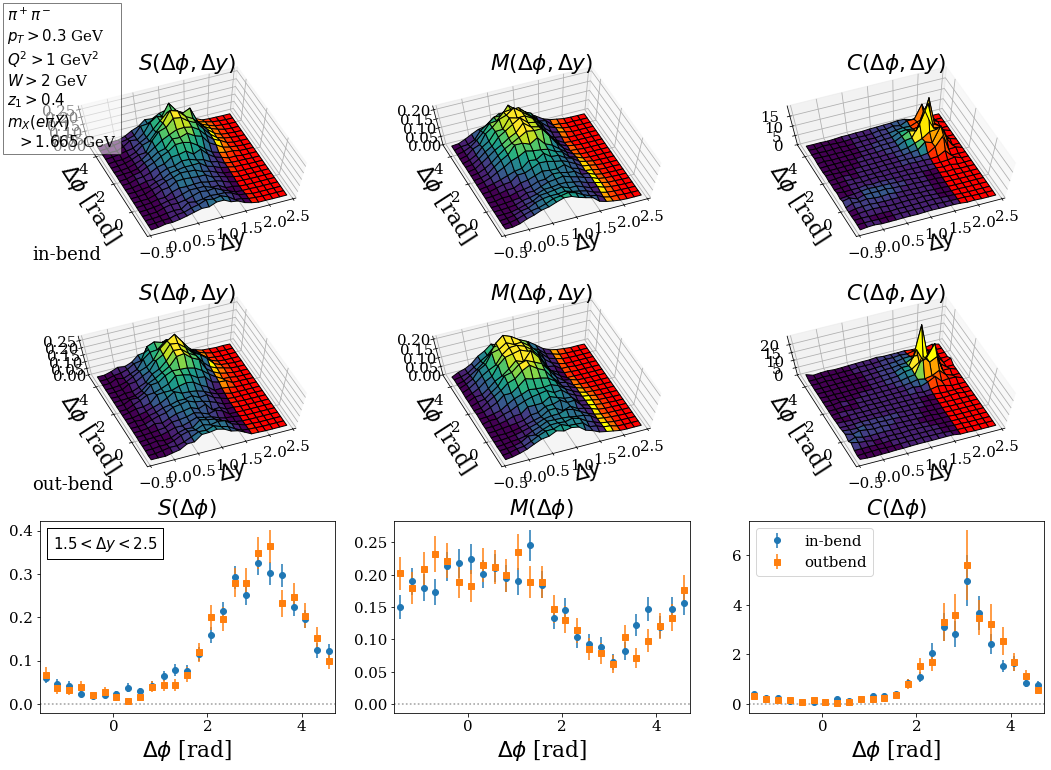

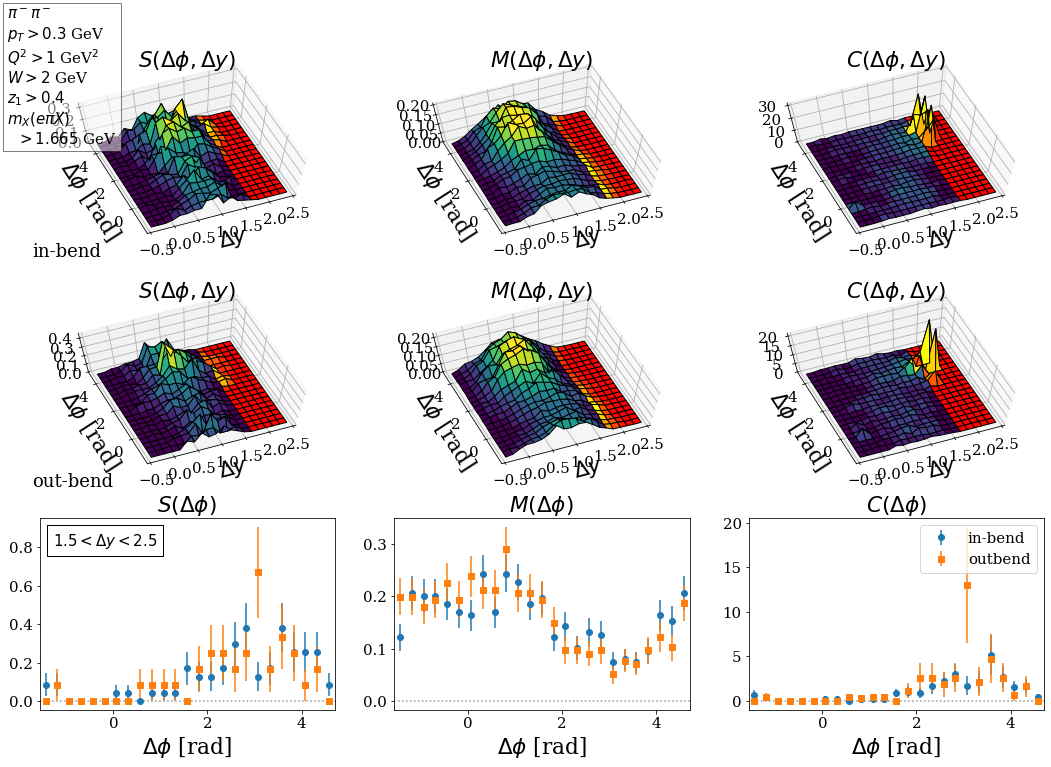

In [66]:
std_query = ' h1_cm_pt>.3 and h1_cm_pt>.3 and h1_z>h2_z and mx_eh1x > 1.665'
std_query += ' and h2_p > 1.0 and h2_p < 1.2 and h2_th>25*3.14159/180 and h2_th<30*3.14159/180'

for name in 'e h1 h2'.split():
    std_query += ' and %s_th > 7*3.14159/180 +  15*3.14159/180/%s_p' % (name,name)

std_text = '\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.4$\n$m_X(e\pi X)$\n  $> 1.665$ GeV'
queries = queries = ['h2_pid==2212 and h1_pid == 211 and ' + std_query,
               'h2_pid==2212 and h1_pid == -211 and ' + std_query,
               'h2_pid==211 and h1_pid ==211 and ' + std_query,
              'h2_pid==211 and h1_pid ==-211 and ' + std_query,
              'h2_pid==-211 and h1_pid ==211 and ' + std_query,
              'h2_pid==-211 and h1_pid ==-211 and ' + std_query]
texts = '$\pi^+ p$;$\pi^- p$;$\pi^+\pi^+$;$\pi^-\pi^+$;$\pi^+\pi^-$;$\pi^-\pi^-$'.split(';')
labels = 'pi+p pi-p pi+pi+ pi-pi+ pi+pi- pi-pi-'.split()
for i in range(6):
    threebythree(queries[i], text=texts[i] + std_text)
    plt.savefig(image_dir +"/smc_inout_"+labels[i]+".pdf",bbox_inches='tight')